=== IRIS DATASET ===
Optimal K for Iris: 1
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



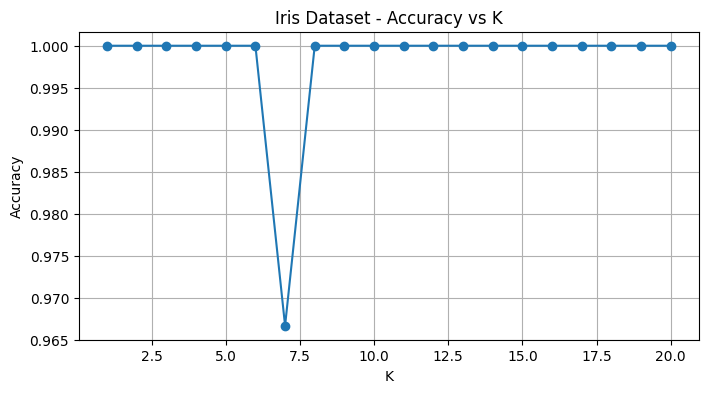


=== DIABETES DATASET ===
Optimal K for Diabetes: 18
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[89 10]
 [26 29]]


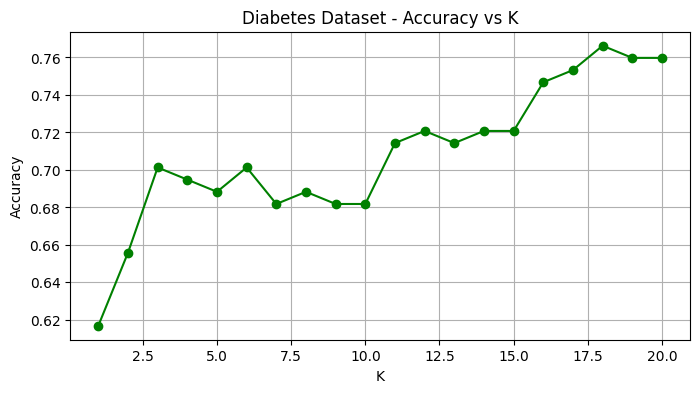

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
iris_df = pd.read_csv('/content/iris (1).csv')
diabetes_df = pd.read_csv('/content/diabetes.csv')

print("=== IRIS DATASET ===")

# Split features and target
X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

# Train-test split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Choose best k
k_range = range(1, 21)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_iris, y_train_iris)
    accuracies.append(knn.score(X_test_iris, y_test_iris))

optimal_k_iris = k_range[accuracies.index(max(accuracies))]
print(f"Optimal K for Iris: {optimal_k_iris}")

# Train and evaluate
knn_iris = KNeighborsClassifier(n_neighbors=optimal_k_iris)
knn_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = knn_iris.predict(X_test_iris)

print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_iris))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_iris))

# Optional: Plot accuracy vs. k for Iris
plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title('Iris Dataset - Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### ---------- DIABETES DATASET ---------- ###
print("\n=== DIABETES DATASET ===")

# Split features and target
X_diabetes = diabetes_df.drop('Outcome', axis=1)
y_diabetes = diabetes_df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

# Train-test split
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)

# Choose best k
k_range_diab = range(1, 21)
accuracies_diab = []
for k in k_range_diab:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_diab, y_train_diab)
    accuracies_diab.append(knn.score(X_test_diab, y_test_diab))

optimal_k_diab = k_range_diab[accuracies_diab.index(max(accuracies_diab))]
print(f"Optimal K for Diabetes: {optimal_k_diab}")

# Train and evaluate
knn_diab = KNeighborsClassifier(n_neighbors=optimal_k_diab)
knn_diab.fit(X_train_diab, y_train_diab)
y_pred_diab = knn_diab.predict(X_test_diab)

print("Accuracy:", accuracy_score(y_test_diab, y_pred_diab))
print("Confusion Matrix:\n", confusion_matrix(y_test_diab, y_pred_diab))

# Optional: Plot accuracy vs. k for Diabetes
plt.figure(figsize=(8, 4))
plt.plot(k_range_diab, accuracies_diab, marker='o', color='green')
plt.title('Diabetes Dataset - Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Optimal K value: 6
Accuracy: 0.9344262295081968


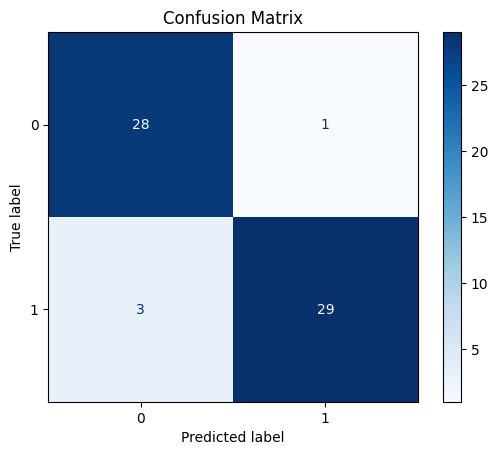

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



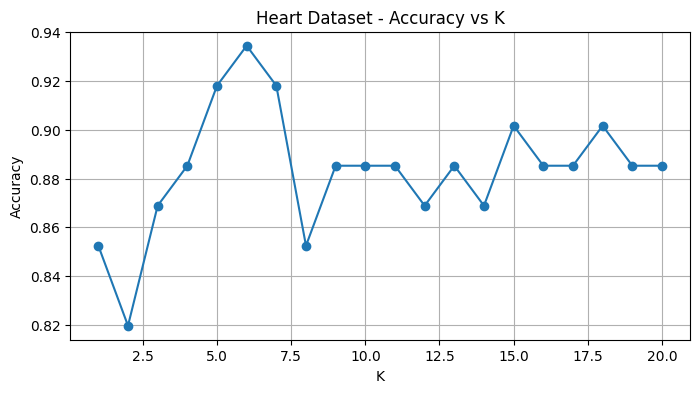

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
heart_df = pd.read_csv("heart.csv")

# Features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find optimal k
k_range = range(1, 21)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

optimal_k = k_range[accuracies.index(max(accuracies))]
print(f"Optimal K value: {optimal_k}")

# Train with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_test, y_pred, output_dict=False)
print("Classification Report:\n", report)

# Optional: Accuracy vs. k plot
plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o')
plt.title('Heart Dataset - Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
